In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3607).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3961).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3958).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3643).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4088).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3679).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3506).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4161).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4121).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3534).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3596).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3460).jpg
/kag

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math 

import datetime
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau 
from keras import backend as K
from keras import optimizers
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, f1_score, accuracy_score
import tensorflow as tf
import tensorflow_addons as tfa

In [3]:
train_datagen_inceptionv3 = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.01
        )

train_generator_inceptionv3 = train_datagen_inceptionv3.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

Found 5094 images belonging to 3 classes.


In [4]:
val_datagen_inceptionv3 = ImageDataGenerator(rescale=1./255)

val_generator_inceptionv3 = train_datagen_inceptionv3.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
        )

Found 50 images belonging to 3 classes.


In [5]:
test_datagen_inceptionv3 = ImageDataGenerator(rescale=1./255)

test_generator_inceptionv3 = test_datagen_inceptionv3.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/test',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [6]:
from keras.applications.inception_v3 import InceptionV3

In [7]:
inception=InceptionV3(input_shape=(299,299,3),
                             include_top=False,
                             weights='imagenet')
for layer in inception.layers:
    layer.trainable=False

87916544/87910968 [==============================] - 1s 0us/step


In [8]:
last_layer=inception.get_layer('mixed10')
last_output = last_layer.output

In [9]:
csv_logger_inception_adam = keras.callbacks.CSVLogger('/kaggle/working/training_inceptionadam.log', separator=',', append=True)

In [10]:
x=layers.GlobalAveragePooling2D()(last_output)
x=layers.Dense(3,activation='softmax')(x)

inceptionv3=keras.Model(inception.input,x)

In [11]:
inceptionv3.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [12]:
history_inception=inceptionv3.fit_generator(train_generator_inceptionv3,
                                            validation_data=val_generator_inceptionv3,
                                            epochs=20,
                                            verbose=2)     

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
160/160 - 301s - loss: 0.3598 - accuracy: 0.8585 - val_loss: 0.3338 - val_accuracy: 0.8600
Epoch 2/20
160/160 - 227s - loss: 0.2253 - accuracy: 0.9121 - val_loss: 0.2124 - val_accuracy: 0.9400
Epoch 3/20
160/160 - 227s - loss: 0.1928 - accuracy: 0.9287 - val_loss: 0.2002 - val_accuracy: 0.9000
Epoch 4/20
160/160 - 226s - loss: 0.1838 - accuracy: 0.9376 - val_loss: 0.2134 - val_accuracy: 0.9000
Epoch 5/20
160/160 - 226s - loss: 0.1687 - accuracy: 0.9389 - val_loss: 0.1586 - val_accuracy: 0.9400
Epoch 6/20
160/160 - 226s - loss: 0.1618 - accuracy: 0.9417 - val_loss: 0.2229 - val_accuracy: 0.9400
Epoch 7/20
160/160 - 227s - loss: 0.1642 - accuracy: 0.9397 - val_loss: 0.2134 - val_accuracy: 0.9600
Epoch 8/20
160/160 - 227s - loss: 0.1517 - accuracy: 0.9468 - val_loss: 0.1653 - val_accuracy: 0.9800
Epoch 9/20
160/160 - 231s - loss: 0.1554 - accuracy: 0.9460 - val_loss: 0.1328 - val_accuracy: 0.9400
Epoch 10/20
160/160 - 229s - loss: 0.1423 - accuracy: 0.9495 - val_loss: 0.1510 - 

In [13]:
inceptionv3.save('kaggle/working/inceptionadam_MODEL')

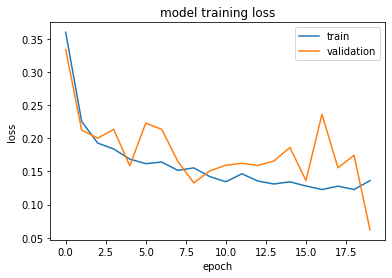

In [14]:
plt.plot(history_inception.history['loss'])
plt.plot(history_inception.history['val_loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

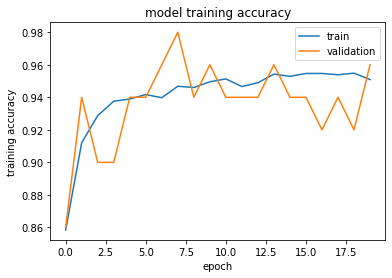

In [15]:
plt.plot(history_inception.history['accuracy'])
plt.plot(history_inception.history['val_accuracy'])
plt.title('model training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [16]:
x=inceptionv3.evaluate_generator(test_generator_inceptionv3)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [17]:
print(f'Testing loss: {x[0]}')
print(f'Testing accuracy: {x[1]}')

Testing loss: 0.19746054708957672
Testing accuracy: 0.9246894121170044


In [18]:
#predicting the class of each image and storing it in array
y_predictions=[]
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/COVID19"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/COVID19/'+img,target_size=(299,299))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = inceptionv3.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/NORMAL/'+img,target_size=(299,299))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = inceptionv3.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))
    
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/'+img,target_size=(299,299))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = inceptionv3.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

y_predictions=np.array(y_predictions)

In [19]:
test_generator_inceptionv3.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [20]:
print(classification_report(test_generator_inceptionv3.classes,y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       116
           1       0.83      0.91      0.87       317
           2       0.95      0.94      0.95       855

    accuracy                           0.92      1288
   macro avg       0.93      0.90      0.91      1288
weighted avg       0.93      0.92      0.93      1288



In [21]:
print(confusion_matrix(test_generator_inceptionv3.classes,y_predictions))

[[100   5  11]
 [  0 290  27]
 [  0  54 801]]


<AxesSubplot:>

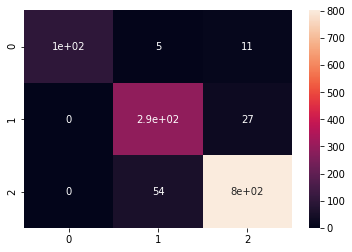

In [22]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_generator_inceptionv3.classes,y_predictions), annot=True)

In [23]:
train_datagen_alexnet = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.01)

train_generator_alexnet = train_datagen_alexnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(256, 256),
        batch_size=128,
        class_mode='categorical',
        subset='training'
        )

Found 5094 images belonging to 3 classes.


In [24]:
val_datagen_alexnet = ImageDataGenerator(rescale=1./255)

val_generator_alexnet = train_datagen_alexnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(256, 256),
        batch_size=128,
        class_mode='categorical',
        subset='validation'
        )

Found 50 images belonging to 3 classes.


In [25]:
test_datagen_alexnet = ImageDataGenerator(rescale=1./255)

test_generator_alexnet = test_datagen_alexnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/test',
        target_size=(256, 256),
        batch_size=128,
        class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [26]:
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), activation='relu'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1),activation='relu', padding="same"))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),activation='relu', padding="same"))
AlexNet.add(BatchNormalization())

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),activation='relu', padding="same"))
AlexNet.add(BatchNormalization())

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),activation='relu', padding="same"))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
AlexNet.add(Dense(4096,activation='relu'))
AlexNet.add(Dropout(0.5))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096,activation='relu'))
AlexNet.add(Dropout(0.5))

#Output Layer
AlexNet.add(Dense(3))
AlexNet.add(Activation('softmax'))

AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 62, 62, 96)        34944     
_________________________________________________________________
batch_normalization_94 (Batc (None, 62, 62, 96)        384       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 30, 30, 256)       614656    
_________________________________________________________________
batch_normalization_95 (Batc (None, 30, 30, 256)       1024      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 14, 14, 384)       8

In [27]:
AlexNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['accuracy'])

In [28]:
history_alexnet=AlexNet.fit_generator(train_generator_alexnet,
                                      validation_data=val_generator_alexnet,
                                      epochs=20,
                                      verbose=2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
40/40 - 228s - loss: 8.8832 - accuracy: 0.6496 - val_loss: 90.2122 - val_accuracy: 0.0800
Epoch 2/20
40/40 - 213s - loss: 1.3448 - accuracy: 0.7656 - val_loss: 5.9838 - val_accuracy: 0.2000
Epoch 3/20
40/40 - 213s - loss: 0.4993 - accuracy: 0.8143 - val_loss: 1.8788 - val_accuracy: 0.4200
Epoch 4/20
40/40 - 211s - loss: 0.4236 - accuracy: 0.8433 - val_loss: 0.6040 - val_accuracy: 0.7400
Epoch 5/20
40/40 - 214s - loss: 0.3972 - accuracy: 0.8514 - val_loss: 1.1401 - val_accuracy: 0.4000
Epoch 6/20
40/40 - 212s - loss: 0.3712 - accuracy: 0.8642 - val_loss: 0.9849 - val_accuracy: 0.5000
Epoch 7/20
40/40 - 209s - loss: 0.3457 - accuracy: 0.8722 - val_loss: 0.4287 - val_accuracy: 0.8400
Epoch 8/20
40/40 - 214s - loss: 0.3423 - accuracy: 0.8775 - val_loss: 0.9738 - val_accuracy: 0.7600
Epoch 9/20
40/40 - 212s - loss: 0.3152 - accuracy: 0.8826 - val_loss: 0.6894 - val_accuracy: 0.8200
Epoch 10/20
40/40 - 214s - loss: 0.2990 - accuracy: 0.8881 - val_loss: 1.8742 - val_accuracy: 0.240

In [29]:
AlexNet.save('kaggle/working/alexnetadam_MODEL')

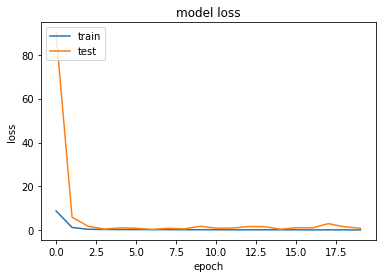

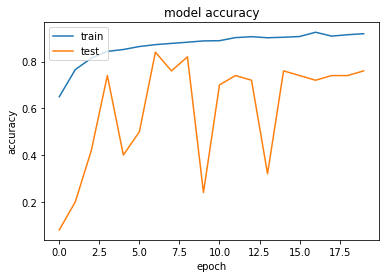

In [30]:
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
AlexNet.save("models_optimizer/alexnet")

In [32]:
AlexNet.evaluate(test_generator_alexnet)

11/11 [==============================] - 36s 3s/step - loss: 0.9674 - accuracy: 0.7430


[0.967376708984375, 0.7430124282836914]

In [33]:
print(f'Testing loss: {x[0]}')
print(f'Testing accuracy: {x[1]}')

Testing loss: 0.19746054708957672
Testing accuracy: 0.9246894121170044


In [34]:
y_predictions=[]
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/COVID19"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/COVID19/'+img,target_size=(256,256))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = AlexNet.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/NORMAL/'+img,target_size=(256,256))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = AlexNet.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))
    
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/'+img,target_size=(256,256))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = AlexNet.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

y_predictions=np.array(y_predictions)

In [35]:
csv_logger_alexnet = keras.callbacks.CSVLogger('/kaggle/working/training_alexnetadam.log', separator=',', append=True)

In [36]:
test_generator_alexnet.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [37]:
print(classification_report(test_generator_alexnet.classes,y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       116
           1       1.00      0.01      0.02       317
           2       0.73      0.98      0.84       855

    accuracy                           0.74      1288
   macro avg       0.85      0.66      0.58      1288
weighted avg       0.81      0.74      0.64      1288



In [38]:
print(confusion_matrix(test_generator_alexnet.classes,y_predictions))

[[113   0   3]
 [ 12   3 302]
 [ 14   0 841]]


<AxesSubplot:>

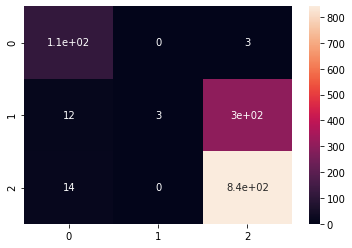

In [39]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_generator_alexnet.classes,y_predictions), annot=True)

In [40]:
train_datagen_resnet = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.01)

train_generator_resnet = train_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='training'
        )

Found 5094 images belonging to 3 classes.


In [41]:
val_datagen_resnet = ImageDataGenerator(rescale=1./255)

val_generator_resnet = train_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='validation'
        )

Found 50 images belonging to 3 classes.


In [42]:
test_datagen_resnet = ImageDataGenerator(rescale=1./255)

test_generator_resnet = test_datagen_resnet.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/test',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [43]:
from keras.applications.resnet50 import ResNet50

In [44]:
from keras.applications.resnet50 import ResNet50

In [45]:
rn50=ResNet50(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

for layer in rn50.layers:
    layer.trainable=False

94773248/94765736 [==============================] - 1s 0us/step


In [46]:
last_layer=rn50.layers[-1]
last_output = last_layer.output

In [47]:
x=layers.GlobalAveragePooling2D()(last_output)
x=layers.Dense(3,activation='softmax')(x)

resnet50=keras.Model(rn50.input,x)

In [48]:
resnet50.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [49]:
resnet50.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['accuracy'])

In [50]:
history_resnet=resnet50.fit_generator(train_generator_resnet,validation_data=val_generator_resnet,epochs=20,verbose=2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
40/40 - 191s - loss: 1.1467 - accuracy: 0.5665 - val_loss: 0.8451 - val_accuracy: 0.6800
Epoch 2/20
40/40 - 187s - loss: 0.8338 - accuracy: 0.6643 - val_loss: 0.7902 - val_accuracy: 0.6800
Epoch 3/20
40/40 - 188s - loss: 0.8177 - accuracy: 0.6643 - val_loss: 0.7851 - val_accuracy: 0.6800
Epoch 4/20
40/40 - 188s - loss: 0.8086 - accuracy: 0.6641 - val_loss: 0.7835 - val_accuracy: 0.6800
Epoch 5/20
40/40 - 188s - loss: 0.7951 - accuracy: 0.6643 - val_loss: 0.7571 - val_accuracy: 0.6800
Epoch 6/20
40/40 - 187s - loss: 0.7849 - accuracy: 0.6641 - val_loss: 0.7516 - val_accuracy: 0.6800
Epoch 7/20
40/40 - 190s - loss: 0.7747 - accuracy: 0.6645 - val_loss: 0.7119 - val_accuracy: 0.7000
Epoch 8/20
40/40 - 190s - loss: 0.7614 - accuracy: 0.6667 - val_loss: 0.7455 - val_accuracy: 0.6800
Epoch 9/20
40/40 - 190s - loss: 0.7527 - accuracy: 0.6665 - val_loss: 0.7133 - val_accuracy: 0.7000
Epoch 10/20
40/40 - 188s - loss: 0.7438 - accuracy: 0.6686 - val_loss: 0.6986 - val_accuracy: 0.7000

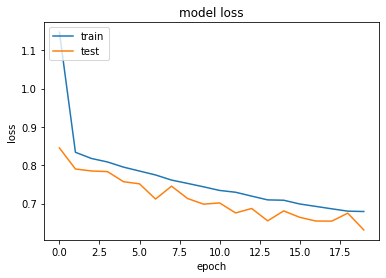

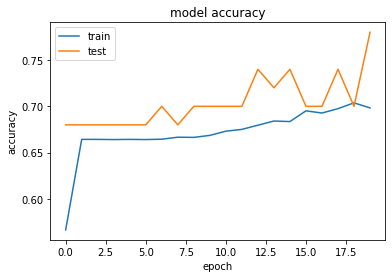

In [51]:
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
resnet50.save('kaggle/working/resnetadam_MODEL')

In [53]:
x=resnet50.evaluate_generator(test_generator_resnet)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [54]:
print(f'Testing loss: {x[0]}')
print(f'Testing accuracy: {x[1]}')

Testing loss: 0.6494777202606201
Testing accuracy: 0.736801266670227


In [55]:
y_predictions=[]
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/COVID19"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/COVID19/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/NORMAL/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))
    
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = resnet50.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

y_predictions=np.array(y_predictions)

In [56]:
csv_logger_resnet = keras.callbacks.CSVLogger('/kaggle/working/training_resnetadam.log', separator=',', append=True)

In [57]:
test_generator_resnet.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [58]:
print(classification_report(test_generator_resnet.classes,y_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.73      0.48      0.58       317
           2       0.74      0.93      0.82       855

    accuracy                           0.74      1288
   macro avg       0.49      0.47      0.47      1288
weighted avg       0.67      0.74      0.69      1288



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(confusion_matrix(test_generator_resnet.classes,y_predictions))

[[  0   0 116]
 [  0 151 166]
 [  0  57 798]]


<AxesSubplot:>

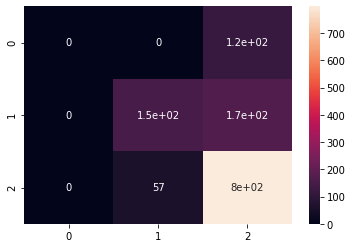

In [60]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_generator_resnet.classes,y_predictions), annot=True)

In [61]:
train_datagen_vgg19 = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.01)

train_generator_vgg19 = train_datagen_vgg19.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='training'
        )

Found 5094 images belonging to 3 classes.


In [62]:
val_datagen_vgg19 = ImageDataGenerator(rescale=1./255)

val_generator_vgg19 = train_datagen_vgg19.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/train',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
        subset='validation'
        )

Found 50 images belonging to 3 classes.


In [63]:
test_datagen_vgg19 = ImageDataGenerator(rescale=1./255)

test_generator_vgg19 = test_datagen_vgg19.flow_from_directory(
        '../input/chest-xray-covid19-pneumonia/Data/test',
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [64]:
from keras.applications.vgg19 import VGG19

In [65]:
vgg_model=VGG19(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')

for layer in vgg_model.layers:
    layer.trainable=False

80142336/80134624 [==============================] - 2s 0us/step


In [66]:
last_layer=vgg_model.layers[-1]
last_output = last_layer.output

In [67]:
x=layers.Flatten()(last_output)
x=layers.Dense(4096,activation='relu')(x)
x=layers.Dropout(0.5)(x)
x=layers.Dense(4096,activation='relu')(x)
x=layers.Dropout(0.5)(x)
x=layers.Dense(3,activation='softmax')(x)

vgg19=keras.Model(vgg_model.input,x)

In [68]:
import tensorflow as tf
import tensorflow_addons as tfa
vgg19.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['accuracy'])

In [69]:
vgg19.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [70]:
history_vgg19=vgg19.fit_generator(train_generator_vgg19,validation_data=val_generator_vgg19,epochs=20,verbose=2)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
40/40 - 842s - loss: 3.6176 - accuracy: 0.7407 - val_loss: 0.6223 - val_accuracy: 0.8000
Epoch 2/20
40/40 - 705s - loss: 0.2972 - accuracy: 0.8895 - val_loss: 0.4589 - val_accuracy: 0.8000
Epoch 3/20
40/40 - 705s - loss: 0.2411 - accuracy: 0.9087 - val_loss: 0.2697 - val_accuracy: 0.9400
Epoch 4/20
40/40 - 705s - loss: 0.2143 - accuracy: 0.9181 - val_loss: 0.3533 - val_accuracy: 0.8600
Epoch 5/20
40/40 - 705s - loss: 0.2091 - accuracy: 0.9246 - val_loss: 0.2102 - val_accuracy: 0.9200
Epoch 6/20
40/40 - 705s - loss: 0.2132 - accuracy: 0.9217 - val_loss: 0.2062 - val_accuracy: 0.9400
Epoch 7/20
40/40 - 705s - loss: 0.2249 - accuracy: 0.9170 - val_loss: 0.2564 - val_accuracy: 0.9400
Epoch 8/20
40/40 - 704s - loss: 0.2141 - accuracy: 0.9236 - val_loss: 0.1916 - val_accuracy: 0.9400
Epoch 9/20
40/40 - 706s - loss: 0.2292 - accuracy: 0.9158 - val_loss: 0.2367 - val_accuracy: 0.9400
Epoch 10/20
40/40 - 705s - loss: 0.2271 - accuracy: 0.9187 - val_loss: 0.3406 - val_accuracy: 0.8400

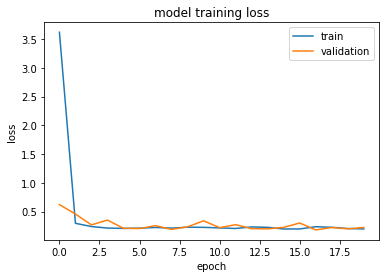

In [71]:
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

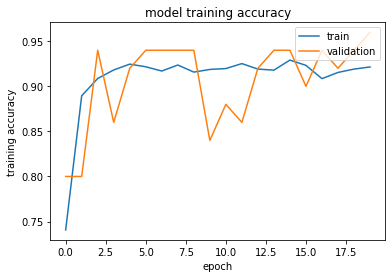

In [72]:
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('model training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [73]:
vgg19.save('kaggle/working/vggadam_MODEL')

In [74]:
csv_logger_vgg = keras.callbacks.CSVLogger('/kaggle/working/training_vggadam.log', separator=',', append=True)

In [75]:
x=vgg19.evaluate_generator(test_generator_vgg19)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [76]:
print(f'Testing loss: {x[0]}')
print(f'Testing accuracy: {x[1]}')

Testing loss: 0.22800251841545105
Testing accuracy: 0.9340062141418457


In [77]:
y_predictions=[]
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/COVID19"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/COVID19/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = vgg19.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/NORMAL/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = vgg19.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))
    
for img in os.listdir("../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"):
    img = load_img('../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/'+img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = vgg19.predict(img/255.0)[0]
    y_predictions.append(np.argmax(result))

y_predictions=np.array(y_predictions)

In [78]:
test_generator_vgg19.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [79]:
print(classification_report(test_generator_vgg19.classes,y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       116
           1       0.85      0.94      0.89       317
           2       0.97      0.95      0.96       855

    accuracy                           0.94      1288
   macro avg       0.94      0.93      0.93      1288
weighted avg       0.94      0.94      0.94      1288



In [80]:
print(confusion_matrix(test_generator_vgg19.classes,y_predictions))

[[104   4   8]
 [  0 297  20]
 [  0  47 808]]


<AxesSubplot:>

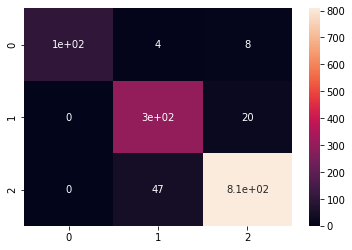

In [81]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_generator_vgg19.classes,y_predictions), annot=True)